In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [79]:
# Read the data
data = pd.read_csv('anime.csv')

In [80]:
data.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age
0,Death Note,8.63,1,"3,150,451",TV,37,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity)
1,Shingeki no Kyojin,8.52,2,"3,136,959",TV,25,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity)
2,Fullmetal Alchemist: Brotherhood,9.16,3,"2,674,846",TV,64,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity)
3,Sword Art Online,7.21,4,"2,583,874",TV,25,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older
4,One Punch Man,8.52,5,"2,577,610",TV,12,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity)


In [81]:
data.isnull().sum()

Name of the anime       0
Rating                 21
Ranking                 0
Followers               0
Type                    0
Episodes                0
License                 0
Study                   0
Genre                 168
Demographics         1116
Age                     0
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name of the anime  2000 non-null   object 
 1   Rating             1979 non-null   float64
 2   Ranking            2000 non-null   int64  
 3   Followers          2000 non-null   object 
 4   Type               2000 non-null   object 
 5   Episodes           2000 non-null   object 
 6   License            2000 non-null   object 
 7   Study              2000 non-null   object 
 8   Genre              1832 non-null   object 
 9   Demographics       884 non-null    object 
 10  Age                2000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 172.0+ KB


In [83]:
data[data == 'Unknown'] = np.nan

In [84]:
newdata = data.drop({'Name of the anime','Genre','Demographics','Followers','Age','License','Study'},axis=1)

In [85]:
newdata.isnull().sum()

Rating      21
Ranking      0
Type         1
Episodes    25
dtype: int64

In [86]:
final = newdata.dropna()

In [107]:
cek = final.Type
cek.unique()

array(['TV', 'Movie', 'ONA', 'OVA', 'Special', 'Music'], dtype=object)

In [88]:
X = final.drop(columns={'Type'})
y = final.Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1577, 3), (395, 3), (1577,), (395,))

In [89]:
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['P1', 'P2']
X_pca.head

<bound method NDFrame.head of             P1        P2
0    -1.728196  0.561249
1    -1.726337  0.104080
2    -1.725020  1.590891
3    -1.722872  0.104472
4    -1.721003 -0.390733
...        ...       ...
1967  1.727107  0.074566
1968  1.728839  0.074837
1969  1.730635 -0.153717
1970  1.732419 -0.343942
1971  1.733916  0.494904

[1972 rows x 2 columns]>

In [90]:
clusters = []
for i in range(1, 30):
    km = KMeans(n_clusters=i).fit(X_pca)
    clusters.append(km.inertia_)

C:\Users\Fajri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Text(0, 0.5, 'Inertia')

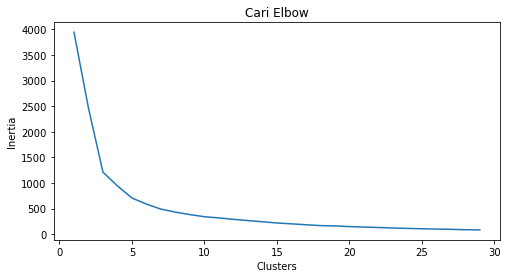

In [91]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 30)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [92]:
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_

In [109]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age,cluster
0,Death Note,8.63,1,"3,150,451",TV,37,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity),2.0
1,Shingeki no Kyojin,8.52,2,"3,136,959",TV,25,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity),2.0
2,Fullmetal Alchemist: Brotherhood,9.16,3,"2,674,846",TV,64,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity),2.0
3,Sword Art Online,7.21,4,"2,583,874",TV,25,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older,2.0
4,One Punch Man,8.52,5,"2,577,610",TV,12,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity),2.0


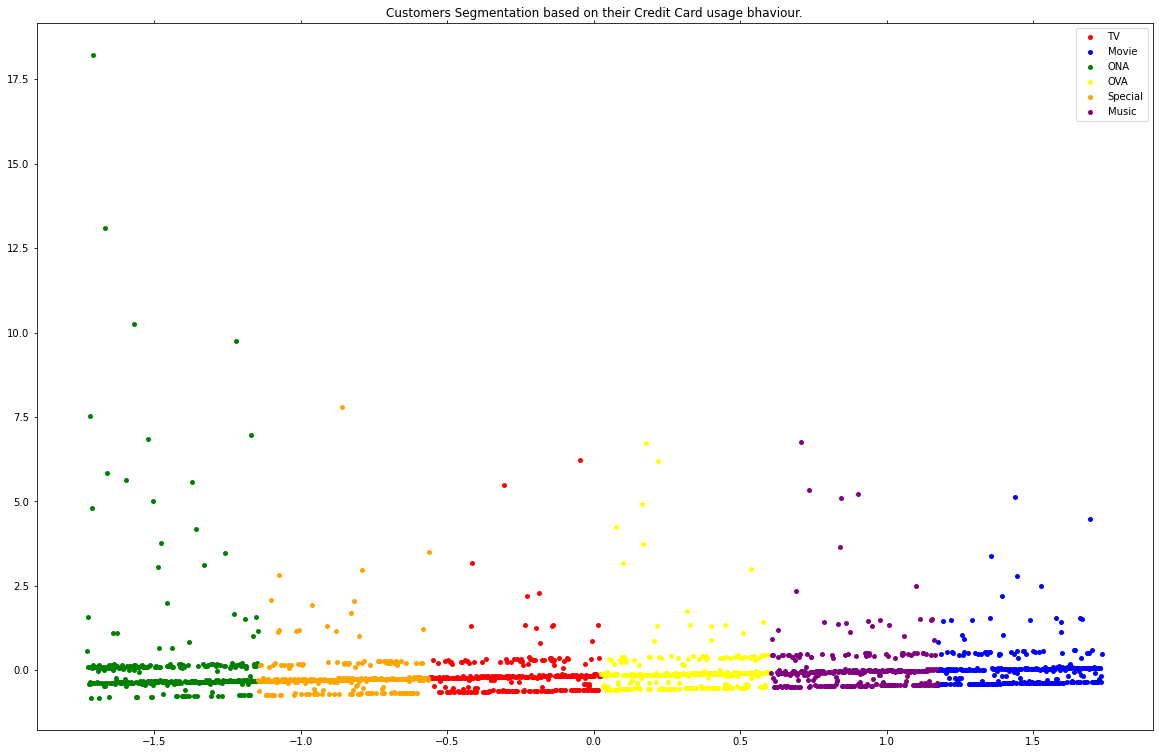

In [94]:
x, y = X_pca['P1'], X_pca['P2']

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'TV', 
         1: 'Movie', 
         2: 'ONA', 
         3: 'OVA', 
         4: 'Special',
         5: 'Music'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()